In [80]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [64]:
from tensorflow.keras.datasets import cifar100

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

In [65]:
# Confirm that reloading the dataset does not required a download

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

### Examine the dataset

In [14]:
# Examine the shape of the data

print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


[41]


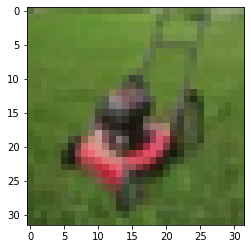

In [15]:
# Examine one of the images and its corresponding label

plt.imshow(train_images[500])
print(train_labels[500])

In [55]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict

In [56]:
cifar100_fine_labels = unpickle('./data/cifar-100-python/meta')['fine_label_names']

In [66]:
# Print a few lines of the labels

cifar100_fine_labels[:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [67]:
# Print the corresponding label for the example above

print(cifar100_fine_labels[41])

lawn_mower


### Load the data using different label modes

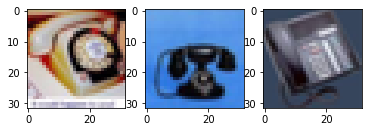

In [68]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2]);

In [69]:
# Reload the data using the 'coarse' label mode

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='coarse')

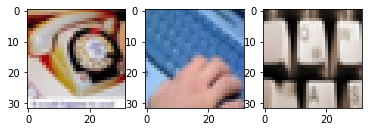

In [70]:
# Display three images form the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2]);

In [71]:
cifar100_coarse_labels = unpickle('./data/cifar-100-python/meta')['coarse_label_names']

In [72]:
# Print a few of the labels

cifar100_coarse_labels[:10]

['aquatic_mammals',
 'fish',
 'flowers',
 'food_containers',
 'fruit_and_vegetables',
 'household_electrical_devices',
 'household_furniture',
 'insects',
 'large_carnivores',
 'large_man-made_outdoor_things']

In [73]:
# print the corresponding label for the example above

print(cifar100_fine_labels[86])
print(cifar100_coarse_labels[5])

telephone
household_electrical_devices


### Load the IMDB Dataset

In [74]:
from tensorflow.keras.datasets import imdb

In [75]:
# Load the IMBD dataset

(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

17465344/17464789 [==============================] - 1s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/mach1ne/anaconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/mach1ne/anaconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

In [76]:
# print an example from the training dataset, along with its corresponding label

print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [77]:
# Get the lengths of the input sequences

sequences_lengths = [len(seq) for seq in train_data]

In [81]:
# Determine the maximum and minimum sequence length

print(np.max(sequences_lengths))
print(np.min(sequences_lengths))

2494
11


### Using keyword arguments

In [83]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(skip_top=50, oov_char=2)

In [84]:
# Get the length of the input sequences

sequences_lengths = [len(seq) for seq in train_data]

In [85]:
# Determine the maximum and minimum sequence length

print(np.max(sequences_lengths))
print(np.min(sequences_lengths))

2494
11


In [86]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' filter function for removing the oov_char.'''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [87]:
# Remove the oov_char from the sequences using the filter_list function

train_data = filter_list(train_data)

In [88]:
# Get the length of the input sequences

sequences_lengths = [len(seq) for seq in train_data]

In [89]:
# Determine the maximum and minimum sequence length

print(np.max(sequences_lengths))
print(np.min(sequences_lengths))

1648
3


In [ ]:
# Get the length of the input sequences

sequences_lengths = [len(seq) for seq in train_data]

# Determine the maximum and minimum sequence length

print(np.max(sequences_lengths))
print(np.min(sequences_lengths))